# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle 
random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [684]:
print("We want that all the values will be the same when we restart our programm")

We want that all the values will be the same when we restart our programm


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [685]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [686]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [687]:
df_test.iloc[:5] #first 5 items

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [688]:
df_test.iloc[-5:] #last 5 items

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [689]:
df_train.describe() #numerical columns

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [690]:
df_test.describe() #numerical columns

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [691]:
cat_names=["name","fuel", "seller_type", "transmission", "owner", "fuel", "seller_type", "transmission", "owner"]
for name in cat_names:
    df_train[name]=df_train[name].astype("category")
    df_test[name]=df_test[name].astype("category") 

In [692]:
df_train.describe(include = "category")

,name,fuel,seller_type,transmission,owner
count,6999,6999,6999,6999,6999
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,116,3793,5826,6095,4587


In [693]:
df_test.describe(include ="category")

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [694]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           1000 non-null   category
 1   year           1000 non-null   int64   
 2   selling_price  1000 non-null   int64   
 3   km_driven      1000 non-null   int64   
 4   fuel           1000 non-null   category
 5   seller_type    1000 non-null   category
 6   transmission   1000 non-null   category
 7   owner          1000 non-null   category
 8   mileage        981 non-null    object  
 9   engine         981 non-null    object  
 10  max_power      981 non-null    object  
 11  torque         981 non-null    object  
 12  seats          981 non-null    float64 
dtypes: category(5), float64(1), int64(3), object(4)
memory usage: 90.2+ KB


>Yes, there are gaps. In df_test they are in columns mileage, engine, max_power, torque and seats.

In [695]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6999 non-null   category
 1   year           6999 non-null   int64   
 2   selling_price  6999 non-null   int64   
 3   km_driven      6999 non-null   int64   
 4   fuel           6999 non-null   category
 5   seller_type    6999 non-null   category
 6   transmission   6999 non-null   category
 7   owner          6999 non-null   category
 8   mileage        6797 non-null   object  
 9   engine         6797 non-null   object  
 10  max_power      6803 non-null   object  
 11  torque         6796 non-null   object  
 12  seats          6797 non-null   float64 
dtypes: category(5), float64(1), int64(3), object(4)
memory usage: 558.8+ KB


>Yes, there are gaps. In df_test they are in columns mileage, engine, max_power, torque and seats.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [696]:
df_train_copy=df_train.copy()
df_train_copy=df_train_copy.drop(labels = "selling_price", axis = 1)
print("Number of objects with the same characteristics:",len(df_train_copy)-len(df_train_copy.drop_duplicates(subset=[x for x in df_train.columns if x != "selling_price"])))

Number of objects with the same characteristics: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [697]:
df_train[df_train.duplicated(subset=[x for x in df_train.columns if x != "selling_price"])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [698]:
df_train = df_train.drop_duplicates(subset=[x for x in df_train.columns if x != "selling_price"])

In [699]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [700]:
df_train.reset_index(drop = True, inplace = True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [701]:
weird_features = ["mileage", "engine", "max_power"]
for name in weird_features:
    df_train[name]=df_train[name].str.split().str[0]
    df_test[name]=df_test[name].str.split().str[0]


In [702]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.1,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [582]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6,1197,81.83,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.9,111.8Nm@ 4000rpm,5.0


In [703]:
#converting to float
for name in weird_features:
    df_train[name]=pd.to_numeric(df_train[name], errors = "coerce")
    df_test[name]=pd.to_numeric(df_test[name], errors = "coerce")

In [704]:
#deleting torque
df_train.drop("torque", axis = 1, inplace = True)
df_test.drop("torque", axis = 1, inplace = True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [705]:
columns = ["mileage", "engine", "max_power", "seats"]
for col in columns:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_train[col].median())


In [706]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           5840 non-null   category
 1   year           5840 non-null   int64   
 2   selling_price  5840 non-null   int64   
 3   km_driven      5840 non-null   int64   
 4   fuel           5840 non-null   category
 5   seller_type    5840 non-null   category
 6   transmission   5840 non-null   category
 7   owner          5840 non-null   category
 8   mileage        5840 non-null   float64 
 9   engine         5840 non-null   float64 
 10  max_power      5840 non-null   float64 
 11  seats          5840 non-null   float64 
dtypes: category(5), float64(4), int64(3)
memory usage: 433.9 KB


In [707]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           1000 non-null   category
 1   year           1000 non-null   int64   
 2   selling_price  1000 non-null   int64   
 3   km_driven      1000 non-null   int64   
 4   fuel           1000 non-null   category
 5   seller_type    1000 non-null   category
 6   transmission   1000 non-null   category
 7   owner          1000 non-null   category
 8   mileage        1000 non-null   float64 
 9   engine         1000 non-null   float64 
 10  max_power      1000 non-null   float64 
 11  seats          1000 non-null   float64 
dtypes: category(5), float64(4), int64(3)
memory usage: 82.3 KB


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (engine и seats к int).</font>

Ниже ответьте, <font color='#FF6600'> почему (хоть мы этого и не делаем) seats, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [124]:
print("Because there are usually 2-6 seats in the cars. So the number of possible choices is so small that one can consider the number of seats as a categorical feature")

Because there are usually 2-6 seats in the cars. So the number of possible choices is so small that one can consider the number of seats as a categorical feature


In [589]:
df_train["engine"]=df_train["engine"].astype(int)
df_test["engine"]=df_test["engine"].astype(int)
df_train["seats"]=df_train["seats"].astype(int)
df_test["seats"]=df_test["seats"].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.pairplot()`` позволяет сделать это в одну строчку

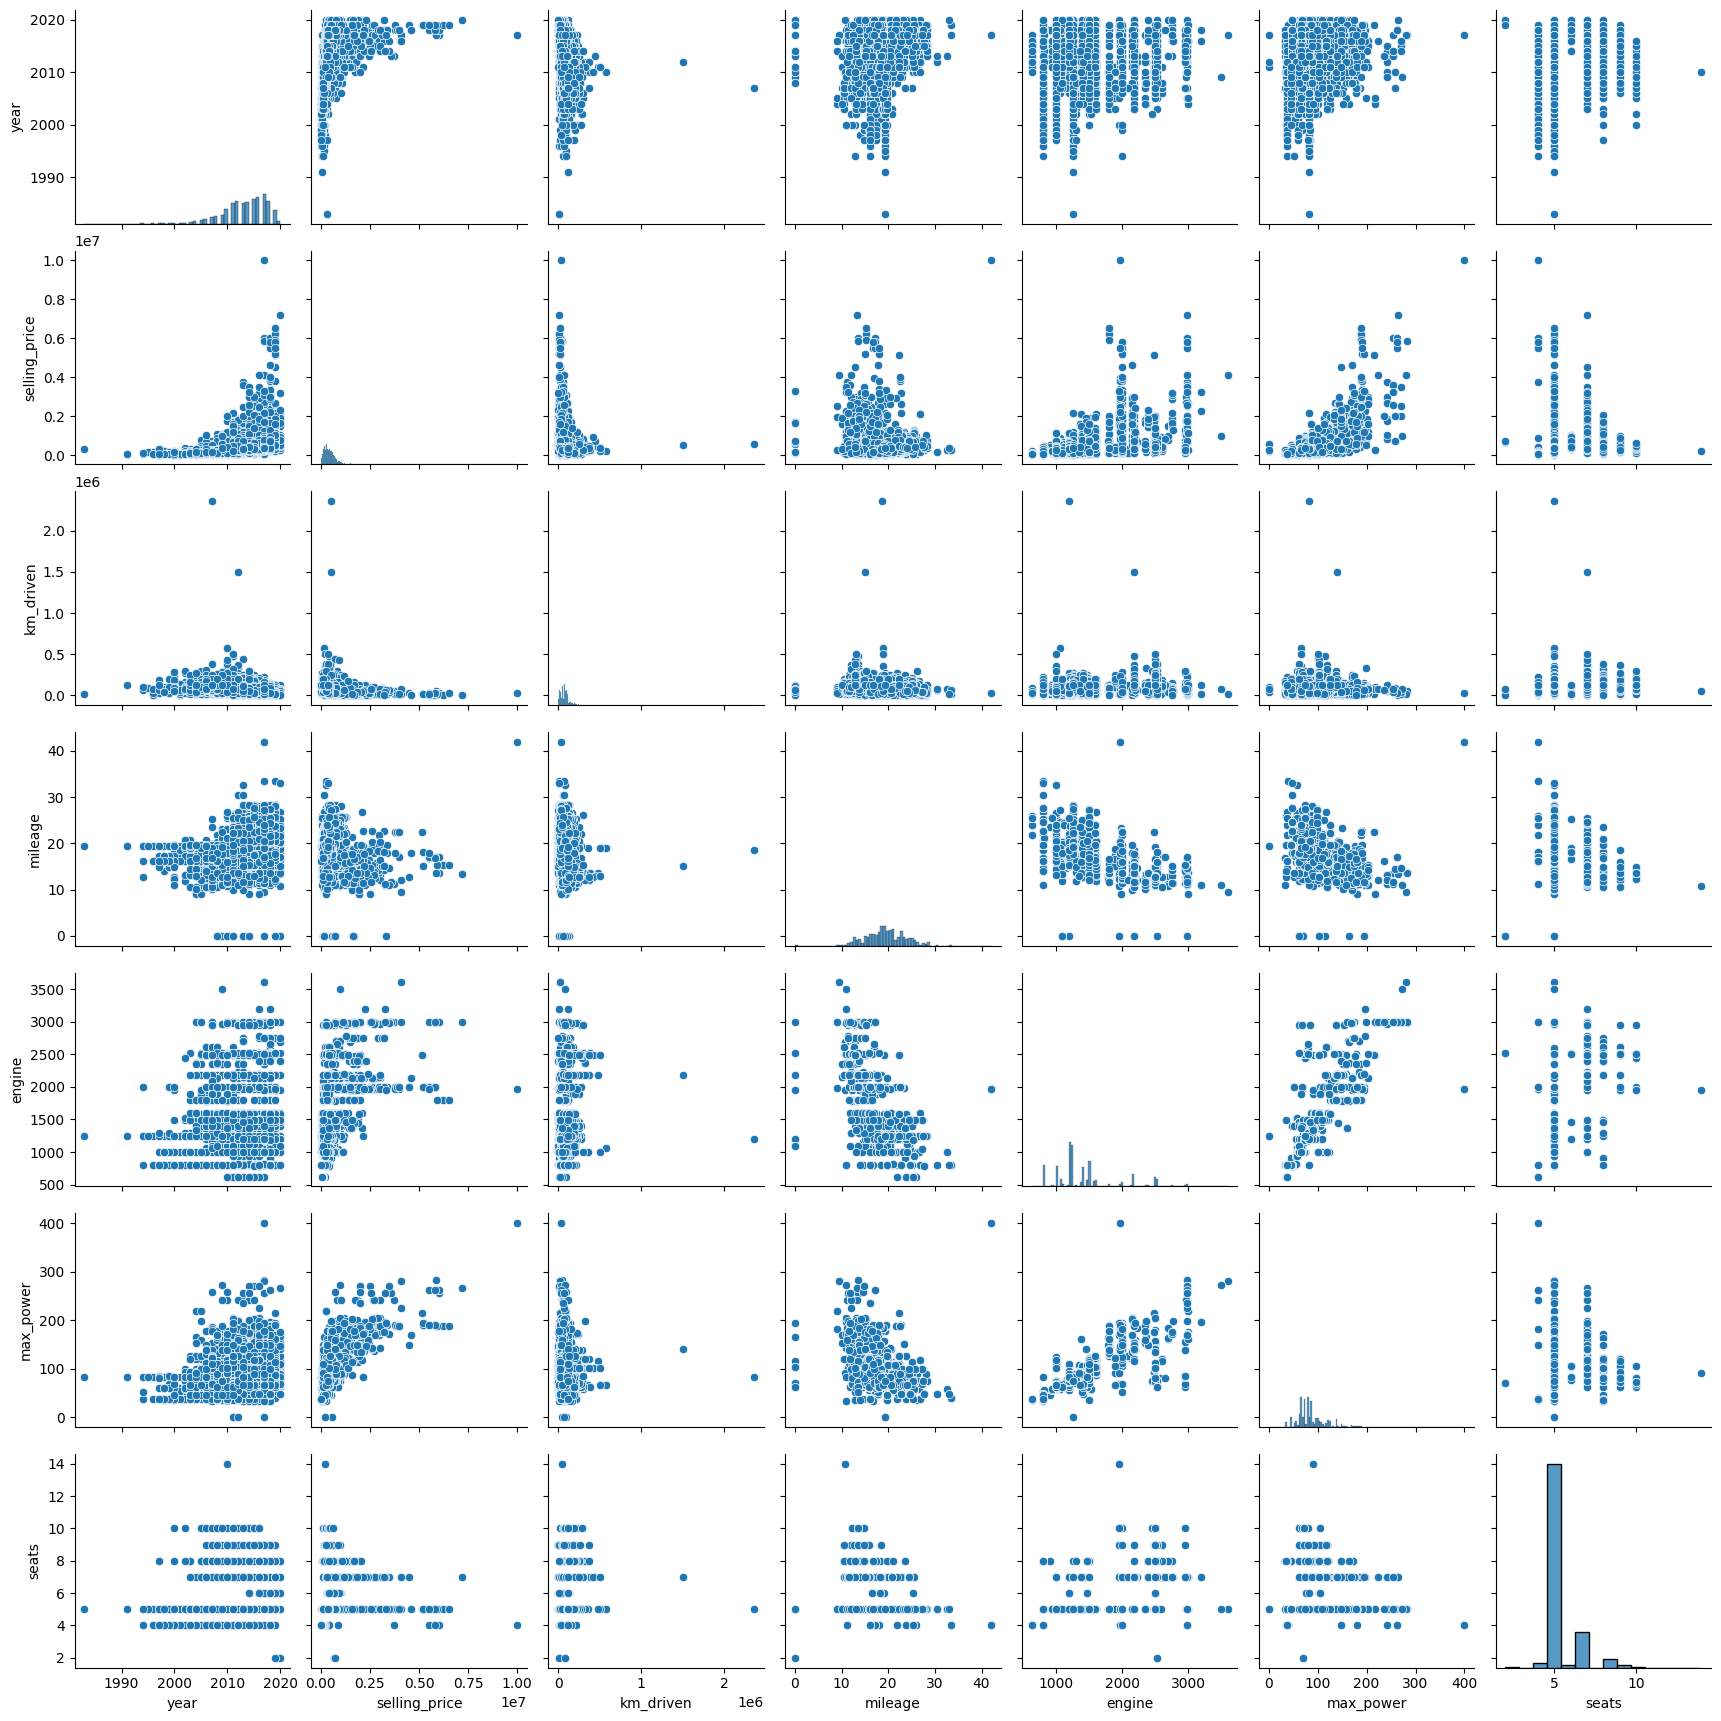

In [590]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

> We see that the selling price is mostly correlated with year, engine and max_power. Moreover, the dependecy from year looks quadratic and the dependency from km_driven looks like 1/x.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

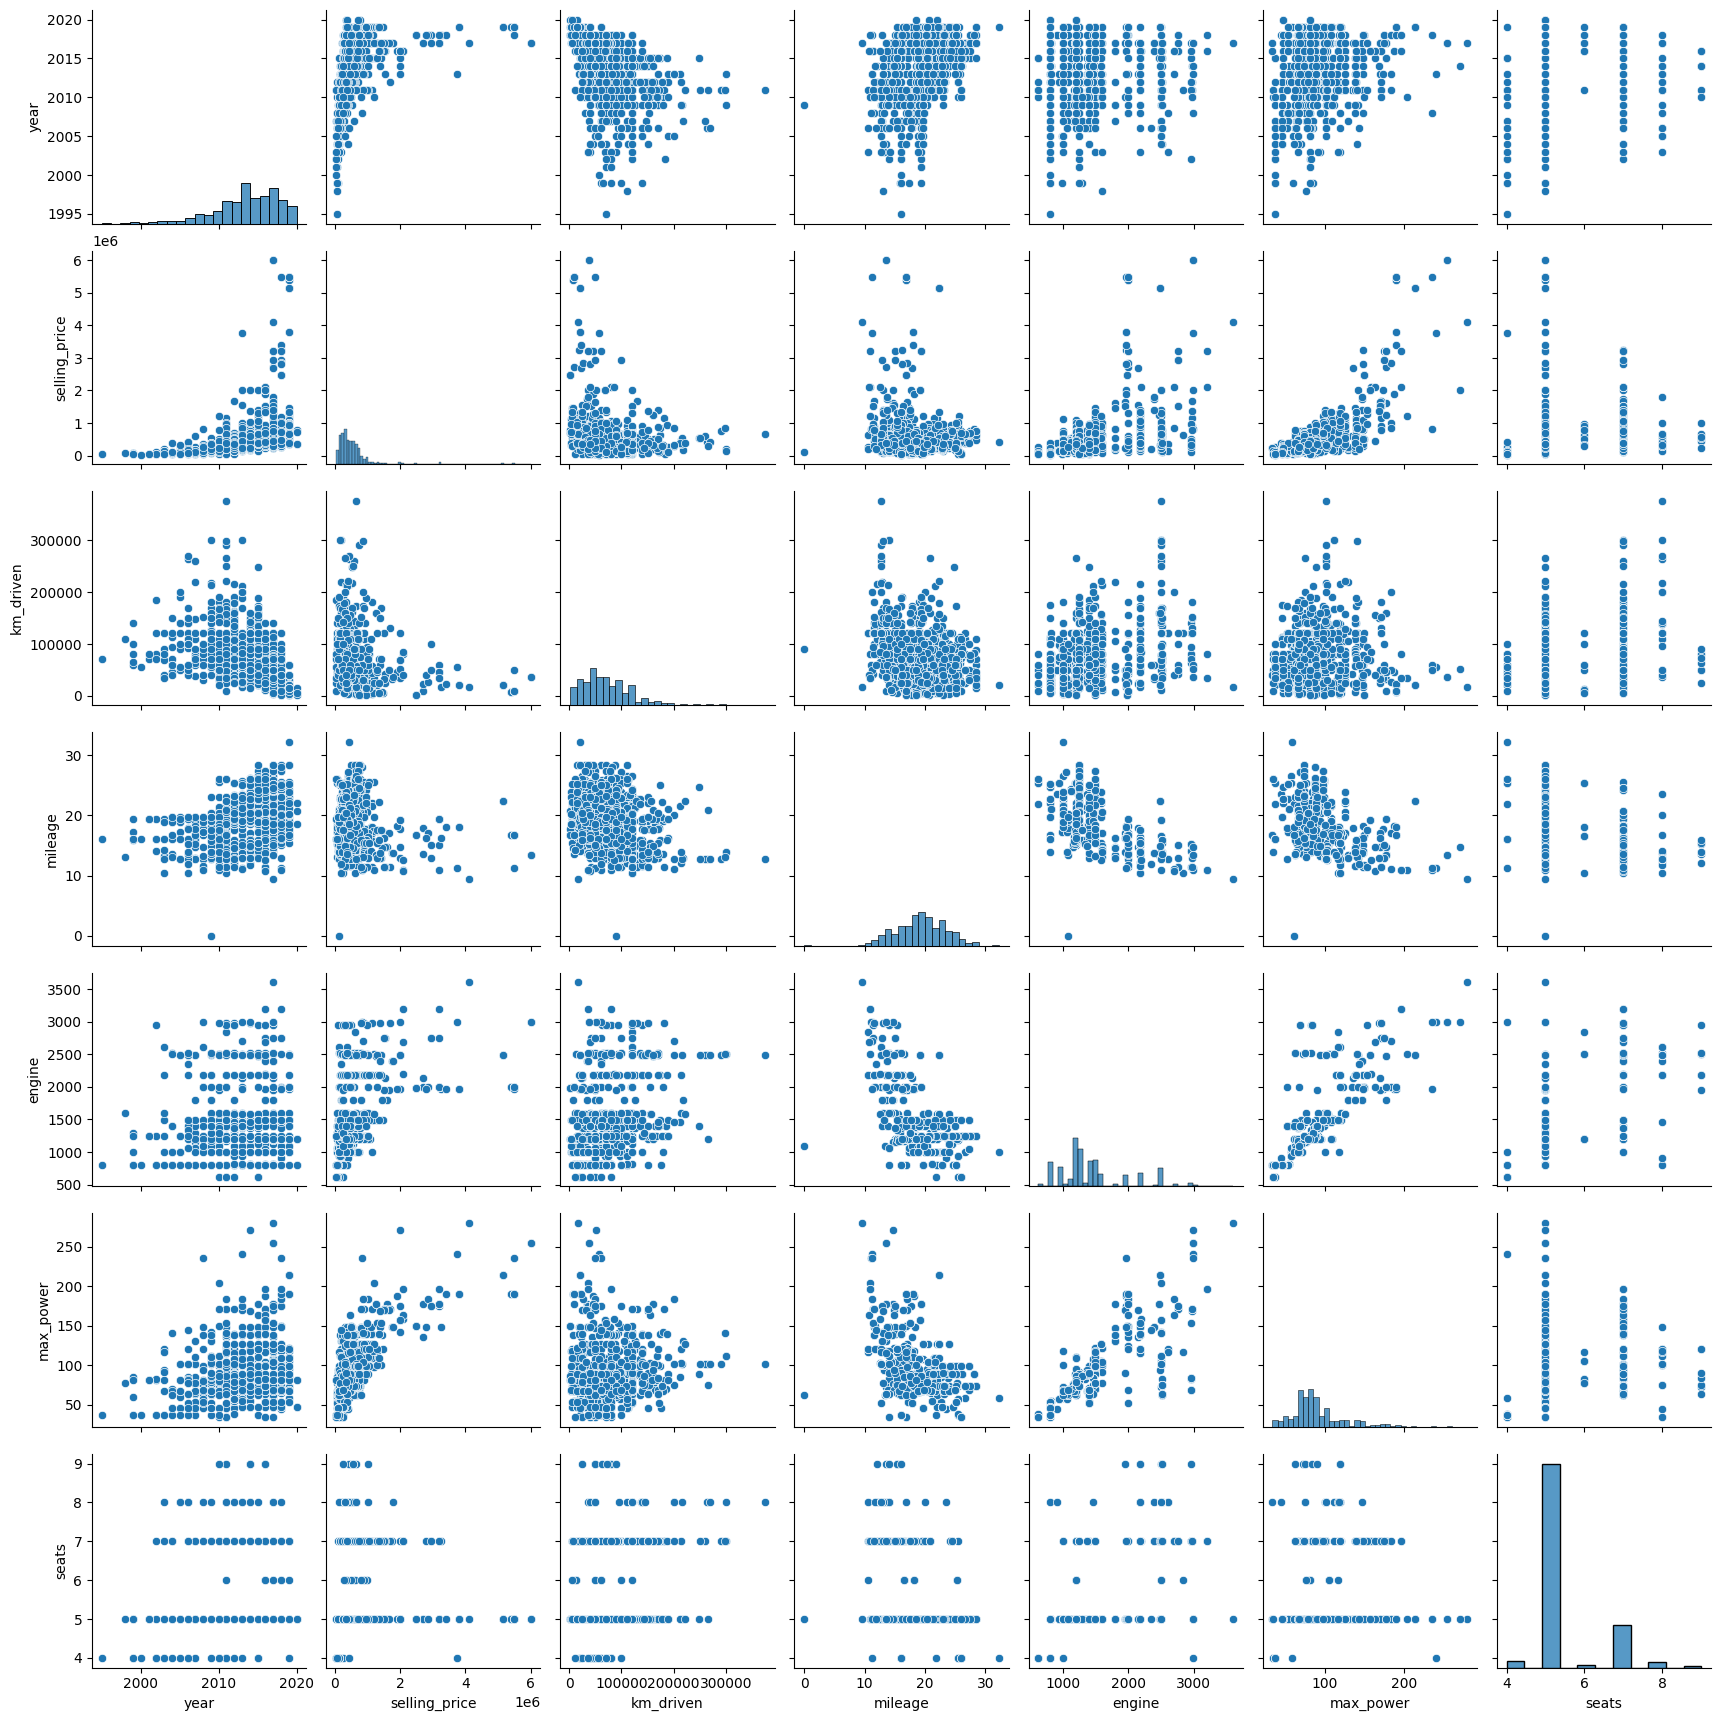

In [200]:
sns.pairplot(df_test)

>Yes, the dependecy looks similar to train. We can also see the selling_price and max_power are even more correlated. 

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

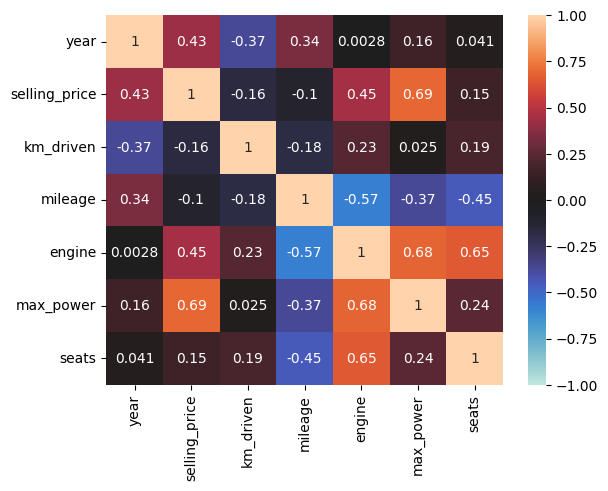

In [201]:
sns.heatmap(df_train[["year", "selling_price", "km_driven", "mileage", "engine", "max_power", "seats" ]].corr(), annot=True, vmin = -1, vmax = 1, center=0)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

> 1) mileage and engine are the least correlated with each other
> 2) between the selling price and max_power.
> 3) No, it does not look exactly like this. But in average this is correct.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'selling_price')

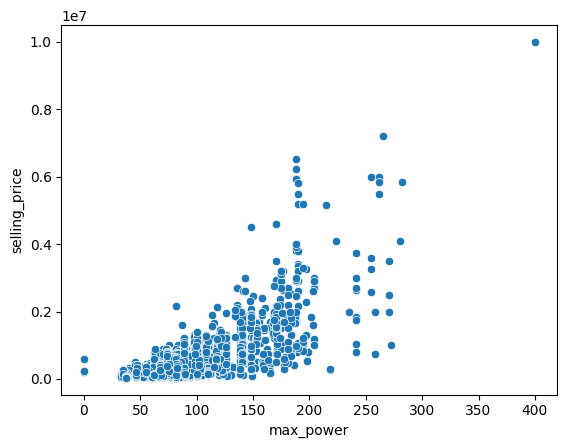

In [202]:
sns.scatterplot(data=df_train[["selling_price", "max_power"]], x="max_power", y = "selling_price")
plt.xlabel("max_power")
plt.ylabel("selling_price")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

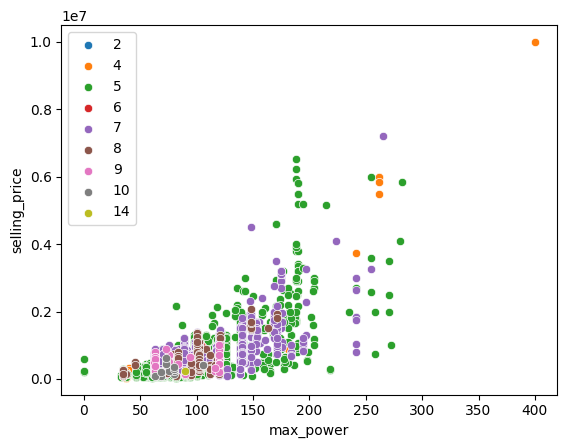

In [203]:
#dependence of selling_price and max_power for df_train with stratification by number of seats 
seatsnew =list(set(df_train["seats"]))
for i in seatsnew: 
    tdf = df_train[df_train["seats"]==i]
    sns.scatterplot(data=tdf[["selling_price", "max_power"]], x="max_power",  y ="selling_price",)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.legend(seatsnew)

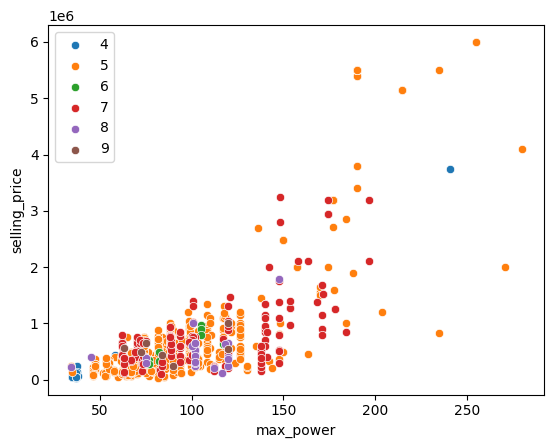

In [204]:
#dependence of selling_price and max_power for df_test with stratification by number of seats 
seatsnew =list(set(df_test["seats"]))
for i in seatsnew: 
    tdf1 = df_test[df_test["seats"]==i]
    sns.scatterplot(data=tdf1[["selling_price", "max_power"]], x="max_power",  y ="selling_price",)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.legend(seatsnew)

<Axes: >

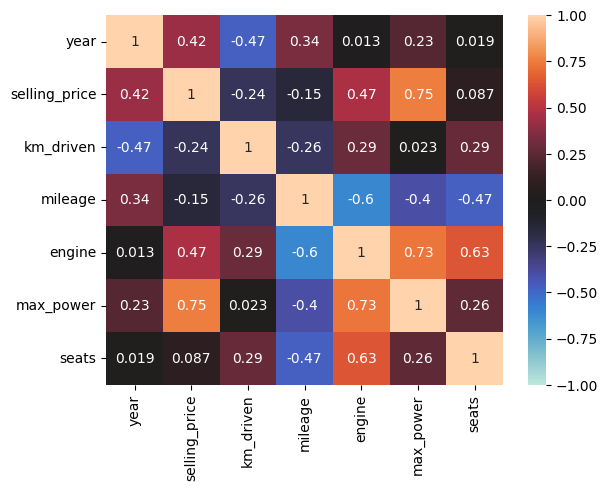

In [205]:
#heatmap for correlations for df_test to see if the correlations between features are the same as in train.
sns.heatmap(df_test[["year", "selling_price", "km_driven", "mileage", "engine", "max_power", "seats" ]].corr(), annot=True, vmin = -1, vmax = 1, center=0)

Text(0, 0.5, 'selling_price')

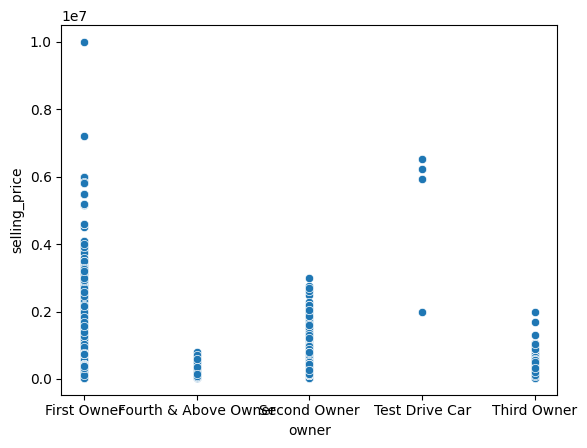

In [782]:
#dependecy of the price on the owner
sns.scatterplot(data=df_train[["selling_price", "owner"]], x="owner", y = "selling_price")
plt.xlabel("owner")
plt.ylabel("selling_price")

Text(0, 0.5, 'selling_price')

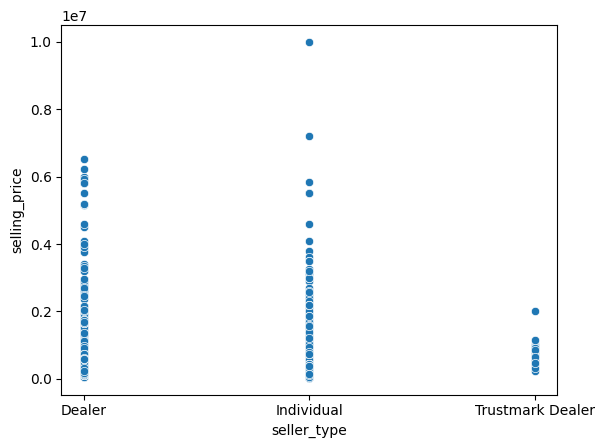

In [802]:
#dependecy of the price on the owner
sns.scatterplot(data=df_train[["selling_price", "seller_type"]], x="seller_type", y = "selling_price")
plt.xlabel("seller_type")
plt.ylabel("selling_price")

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [206]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [209]:
y_train = df_train["selling_price"]
X_train = df_train.drop(["selling_price", "fuel", "seller_type", "transmission", "owner", "name"], axis = 1, inplace = False)


In [211]:
y_test = df_test["selling_price"]
X_test = df_test.drop(["selling_price", "fuel", "seller_type", "transmission", "owner", "name"], axis = 1, inplace = False)

In [708]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

r2_score(y_train, model.predict(X_train))


0.5922591702157316

In [850]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [219]:
MSE(y_train, model.predict(X_train))

116874153930.02855

In [218]:
r2_score(y_test, model.predict(X_test))

0.5941419794788428

In [220]:
MSE(y_test, model.predict(X_test))

233298779730.45486

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)

model = LinearRegression()

model.fit(X_train_norm, y_train)

r2_score(y_train, model.predict(X_train_norm))


0.5922591702157303

In [228]:
X_test_norm = scaler.transform(X_test)
r2_score(y_test, model.predict(X_test_norm))

0.594141979478852

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [232]:
np.abs(model.coef_).argmax()

4

In [236]:
X_train.columns[4]
# max_power is the most informative feature 

'max_power'

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

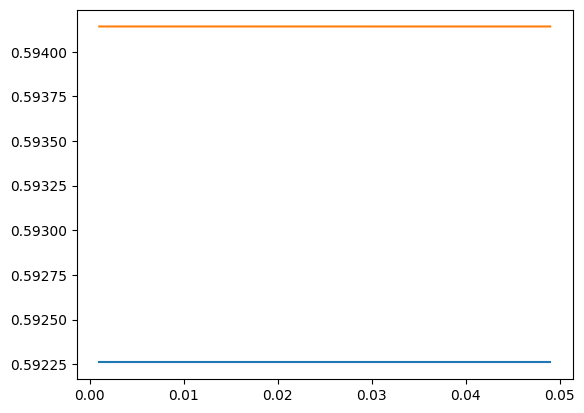

In [281]:
from sklearn.linear_model import Lasso
r2sc_train=[]
r2sc_test=[]
for x in np.arange(0.001, 0.05, 0.001):
    model_l1 = Lasso(alpha=x)
    model_l1.fit(X_train_norm, y_train)
    r2sc_train.append(r2_score(y_train, model_l1.predict(X_train_norm)))
    r2sc_test.append(r2_score(y_test, model_l1.predict(X_test_norm)))

plt.plot(np.arange(0.001, 0.05, 0.001), r2sc_train)
plt.plot(np.arange(0.001, 0.05, 0.001), r2sc_test)
#plots show that there is no significant difference between different choices of alpha for small alpha.


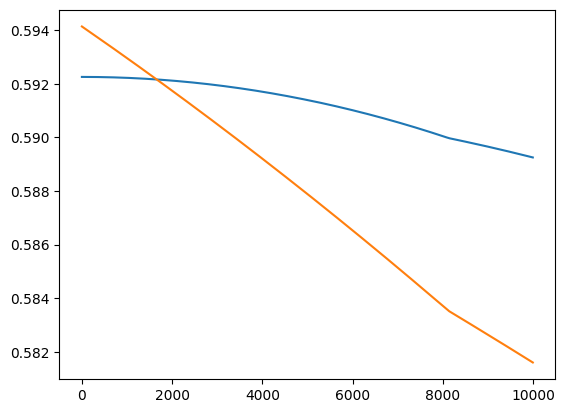

In [282]:
from sklearn.linear_model import Lasso
r2sc_train=[]
r2sc_test=[]
for x in np.arange(0.5, 10000, 10):
    model_l1 = Lasso(alpha=x)
    model_l1.fit(X_train_norm, y_train)
    r2sc_train.append(r2_score(y_train, model_l1.predict(X_train_norm)))
    r2sc_test.append(r2_score(y_test, model_l1.predict(X_test_norm)))

plt.plot(np.arange(0.5, 10000, 10), r2sc_train)
plt.plot(np.arange(0.5, 10000, 10), r2sc_test)
#plots show that for big alpha there is difference for r2_score


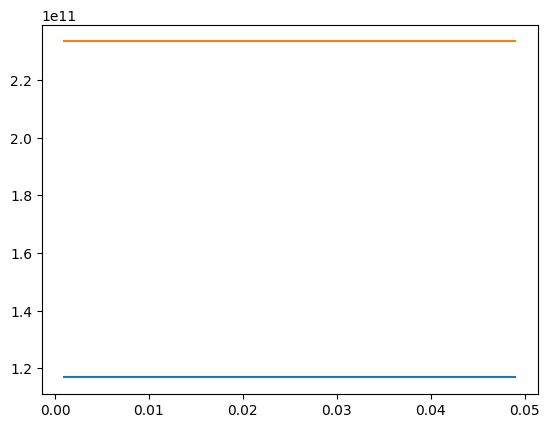

In [265]:
mse_train=[]
mse_test=[]
for x in np.arange(0.001, 0.05, 0.001):
    model_l1 = Lasso(alpha=x)
    model_l1.fit(X_train_norm, y_train)
    mse_train.append(MSE(y_train, model_l1.predict(X_train_norm)))
    mse_test.append(MSE(y_test, model_l1.predict(X_test_norm)))

plt.plot(np.arange(0.001, 0.05, 0.001), mse_train)
plt.plot(np.arange(0.001, 0.05, 0.001), mse_test)
#plots show that there is no significant difference between different choices of alpha.

In [284]:
model_l1 = Lasso(alpha=1)
model_l1.fit(X_train_norm, y_train)
print("r2_score for y_train:", r2_score(y_train, model_l1.predict(X_train_norm)))
print("MSE for y_train:", MSE(y_train, model_l1.predict(X_train_norm)))
print("r2_score for y_test:", r2_score(y_test, model_l1.predict(X_test_norm)))
print("MSE for y_test:", MSE(y_test, model_l1.predict(X_test_norm)))

r2_score for y_train: 0.5922591701804456
MSE for y_train: 116874153940.1429
r2_score for y_test: 0.5941408124026637
MSE for y_test: 233299450599.16928


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [285]:
model_l1.coef_
#no, it didn’t make it zero for small alpha. Since for small alpha this term does not make any difference.
#If one considers alpha, for example,100000, there will be several zero terms.

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [292]:
from sklearn.model_selection import GridSearchCV
LassoRegression = Lasso()
hyperParameters = {'alpha':[0.1,10, 100, 200, 300, 400, 500, 600, 700, 800, 1000]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=10)
LassoRegressor.fit(X_train_norm,y_train)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 1000}
Best score for cost function:  0.568895116634703


In [293]:
LassoRegression = Lasso()
values = list(np.arange(500,10000, 50))
hyperParameters = {'alpha':values}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=10)
LassoRegressor.fit(X_train_norm,y_train)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 9950}
Best score for cost function:  0.5727035980352267


In [294]:
LassoRegression = Lasso()
values = list(np.arange(9000,100000, 1000))
hyperParameters = {'alpha':values}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=10)
LassoRegressor.fit(X_train_norm,y_train)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 27000}
Best score for cost function:  0.5750256476647783


In [295]:
LassoRegression = Lasso()
values = list(np.arange(25000,35000, 200))
hyperParameters = {'alpha':values}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=10)
LassoRegressor.fit(X_train_norm,y_train)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 26600}
Best score for cost function:  0.5750274755495216


In [296]:
LassoRegression = Lasso()
values = list(np.arange(25000,27000, 10))
hyperParameters = {'alpha':values}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=10)
LassoRegressor.fit(X_train_norm,y_train)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 26610}
Best score for cost function:  0.5750274764701039


In [297]:
LassoRegression = Lasso()
values = list(np.arange(26500,26750, 1))
hyperParameters = {'alpha':values}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=10)
LassoRegressor.fit(X_train_norm,y_train)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 26609}
Best score for cost function:  0.5750274764855394


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [305]:
print( "gridsearch had to train:", 11+ len(np.arange(500,10000, 50))+len(np.arange(9000,100000, 1000))+len(np.arange(25000,35000, 200))+len(np.arange(25000,27000, 10))+len(np.arange(26500,26750, 1)), "models")

gridsearch had to train: 792 models


best value for alpha is 26609. For this alpha 3 of 6 coefficients are zero.

In [299]:
model1_l1 = Lasso(alpha=26609)
model1_l1.fit(X_train_norm, y_train)
model1_l1.coef_

array([145859.67326325, -15733.61547572,      0.        ,      0.        ,
       321821.56166739,     -0.        ])

In [851]:
with open("model1_l1.pkl", "wb") as f:
    pickle.dump(model1_l1, f)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [319]:
from sklearn.linear_model import ElasticNet
ElasticNetreg = ElasticNet()
values_1 = list(np.logspace(-5,5, 50))
values_2 = np.concatenate((np.logspace(-15, -1,20, base =2), 1 - np.logspace(-15, -1,20, base =2)))
hyperParameters = {'alpha':values_1, 'l1_ratio': values_2}
ElasticNetRegressor = GridSearchCV(ElasticNetreg, hyperParameters, scoring='r2', cv=10)
ElasticNetRegressor.fit(X_train_norm,y_train)
print("Best value for alpha and l1_ratio : ",ElasticNetRegressor.best_params_)
print("Best score for cost function: ", ElasticNetRegressor.best_score_)

/home/mgerasim/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+13, tolerance: 1.247e+11
  model = cd_fast.enet_coordinate_descent(
/home/mgerasim/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.977e+12, tolerance: 1.564e+11
  model = cd_fast.enet_coordinate_descent(
/home/mgerasim/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Best value for alpha and l1_ratio :  {'alpha': 3727.593720314938, 'l1_ratio': 0.999969482421875}
Best score for cost function:  0.5773397761780142


In [330]:
ElasticNetreg = ElasticNet()
values_1 = list(np.arange(3000,5000, 100))
values_2 = list(np.arange(0.95, 1, 0.0001))
hyperParameters = {'alpha':values_1, 'l1_ratio': values_2}
ElasticNetRegressor = GridSearchCV(ElasticNetreg, hyperParameters, scoring='r2', cv=10)
ElasticNetRegressor.fit(X_train_norm,y_train)
print("Best value for alpha and l1_ratio : ",ElasticNetRegressor.best_params_)
print("Best score for cost function: ", ElasticNetRegressor.best_score_)

Best value for alpha and l1_ratio :  {'alpha': 4900, 'l1_ratio': 0.9999999999999944}
Best score for cost function:  0.570929075455553


In [710]:
ElasticNetreg = ElasticNet()
values_1 = list(np.arange(4900,10000, 100))
values_2 = list(np.arange(0.98, 1, 0.001))
hyperParameters = {'alpha':values_1, 'l1_ratio': values_2}
ElasticNetRegressor = GridSearchCV(ElasticNetreg, hyperParameters, scoring='r2', cv=10)
ElasticNetRegressor.fit(X_train_norm,y_train)
print("Best value for alpha and l1_ratio : ",ElasticNetRegressor.best_params_)
print("Best score for cost function: ", ElasticNetRegressor.best_score_)

Best value for alpha and l1_ratio :  {'alpha': 9900, 'l1_ratio': 1.0}
Best score for cost function:  0.5726873027094754


In [711]:
ElasticNetreg = ElasticNet()
values_1 = list(np.arange(9000,20000, 100))
values_2 = list(np.arange(0.98, 1, 0.01))
hyperParameters = {'alpha':values_1, 'l1_ratio': values_2}
ElasticNetRegressor = GridSearchCV(ElasticNetreg, hyperParameters, scoring='r2', cv=10)
ElasticNetRegressor.fit(X_train_norm,y_train)
print("Best value for alpha and l1_ratio : ",ElasticNetRegressor.best_params_)
print("Best score for cost function: ", ElasticNetRegressor.best_score_)

Best value for alpha and l1_ratio :  {'alpha': 19900, 'l1_ratio': 1.0}
Best score for cost function:  0.57447354277818


In [712]:
ElasticNetreg = ElasticNet()
values_1 = list(np.arange(19000,30000, 100))
values_2 = list(np.arange(0.98, 1, 0.01))
hyperParameters = {'alpha':values_1, 'l1_ratio': values_2}
ElasticNetRegressor = GridSearchCV(ElasticNetreg, hyperParameters, scoring='r2', cv=10)
ElasticNetRegressor.fit(X_train_norm,y_train)
print("Best value for alpha and l1_ratio : ",ElasticNetRegressor.best_params_)
print("Best score for cost function: ", ElasticNetRegressor.best_score_)

Best value for alpha and l1_ratio :  {'alpha': 26600, 'l1_ratio': 1.0}
Best score for cost function:  0.5750274755495216


In [715]:
ElasticNetreg = ElasticNet()
values_1 = list(np.arange(26000,27000,10))
values_2 = list(np.arange(0.99, 1, 0.001))
hyperParameters = {'alpha':values_1, 'l1_ratio': values_2}
ElasticNetRegressor = GridSearchCV(ElasticNetreg, hyperParameters, scoring='r2', cv=10)
ElasticNetRegressor.fit(X_train_norm,y_train)
print("Best value for alpha and l1_ratio : ",ElasticNetRegressor.best_params_)
print("Best score for cost function: ", ElasticNetRegressor.best_score_)

Best value for alpha and l1_ratio :  {'alpha': 26610, 'l1_ratio': 1.0}
Best score for cost function:  0.5750274764701039


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

>Best value for alpha and l1_ratio :  {'alpha': 26610, 'l1_ratio': 0.9999999999999944}
Best score for cost function:  0.5750274764701039

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [744]:
X_train_cat =df_train.drop(["selling_price", "name"], axis = 1, inplace = False)

In [745]:
assert X_train_cat.shape == (5840, 10)

In [746]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5840 non-null   int64   
 1   km_driven     5840 non-null   int64   
 2   fuel          5840 non-null   category
 3   seller_type   5840 non-null   category
 4   transmission  5840 non-null   category
 5   owner         5840 non-null   category
 6   mileage       5840 non-null   float64 
 7   engine        5840 non-null   float64 
 8   max_power     5840 non-null   float64 
 9   seats         5840 non-null   float64 
dtypes: category(4), float64(4), int64(2)
memory usage: 297.3 KB


In [747]:
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_train_cat[name]= X_train_cat[name].astype("object")


In [748]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840.0
unique,4,3,2,5,9.0
top,Diesel,Individual,Manual,First Owner,5.0
freq,3177,5223,5336,3603,4618.0


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [749]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer=make_column_transformer((OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["fuel", "seller_type", "transmission", "owner", "seats"]), remainder = "passthrough")
transformed=transformer.fit_transform(X_train_cat)
transformed_df_train=pd.DataFrame(transformed, columns =transformer.get_feature_names_out())

transformed_df_train.head(10)

,onehotencoder__fuel_Diesel,onehotencoder__fuel_LPG,onehotencoder__fuel_Petrol,onehotencoder__seller_type_Individual,onehotencoder__seller_type_Trustmark Dealer,onehotencoder__transmission_Manual,onehotencoder__owner_Fourth & Above Owner,onehotencoder__owner_Second Owner,onehotencoder__owner_Test Drive Car,onehotencoder__owner_Third Owner,...,onehotencoder__seats_7.0,onehotencoder__seats_8.0,onehotencoder__seats_9.0,onehotencoder__seats_10.0,onehotencoder__seats_14.0,remainder__year,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2014.0,145500.0,23.40,1248.0,74.00
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2014.0,120000.0,21.14,1498.0,103.52
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2010.0,127000.0,23.00,1396.0,90.00
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2007.0,120000.0,16.10,1298.0,88.20
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017.0,45000.0,20.14,1197.0,81.86
5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2007.0,175000.0,17.30,1061.0,57.50
6,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2001.0,5000.0,16.10,796.0,37.00
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011.0,90000.0,23.59,1364.0,67.10
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013.0,169000.0,20.00,1399.0,68.10
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2014.0,68000.0,19.01,1461.0,108.45


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [750]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

RidgeRegression = Ridge()
values_new = list(np.arange(1,10000, 100))
hyperParameters = {'alpha':values_new}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_train,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 1}
Best score for cost function:  0.6193104965396927


In [751]:
RidgeRegression = Ridge()
values_new = list(np.arange(1,100, 1))
hyperParameters = {'alpha':values_new}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_train,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7}
Best score for cost function:  0.6219576713278245


In [725]:
RidgeRegression = Ridge()
values_new = list(np.arange(0.5,50, 0.5))
hyperParameters = {'alpha':values_new}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_train,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7.0}
Best score for cost function:  0.6219576713278245


In [726]:
RidgeRegression = Ridge()
values_new = list(np.arange(1,10, 0.1))
hyperParameters = {'alpha':values_new}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_train,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7.000000000000005}
Best score for cost function:  0.6219576713278242


In [727]:
RidgeRegression = Ridge()
values_new = list(np.arange(6.8,7.5, 0.001))
hyperParameters = {'alpha':values_new}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_train,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7.01000000000007}
Best score for cost function:  0.6219576728502771


In [752]:
model2_l2 = Ridge(alpha=7)
model2_l2.fit(transformed_df_train, y_train)
print("r2_score for y_train:", r2_score(y_train, model2_l2.predict(transformed_df_train)))
print("MSE for y_train:", MSE(y_train, model2_l2.predict(transformed_df_train)))


r2_score for y_train: 0.6565982103937898
MSE for y_train: 98432118361.84863


In [852]:
with open("model2_l2.pkl", "wb") as f:
    pickle.dump(model2_l2, f)

In [753]:
X_test_cat =df_test.drop(["selling_price", "name"], axis = 1, inplace = False)
for name in name_obj:
    X_test_cat[name]= X_test_cat[name].astype("object")

transformed_test=transformer.transform(X_test_cat)
transformed_df_test=pd.DataFrame(transformed_test, columns =transformer.get_feature_names_out())

In [730]:
transformed_df_test

,onehotencoder__fuel_Diesel,onehotencoder__fuel_LPG,onehotencoder__fuel_Petrol,onehotencoder__seller_type_Individual,onehotencoder__seller_type_Trustmark Dealer,onehotencoder__transmission_Manual,onehotencoder__owner_Fourth & Above Owner,onehotencoder__owner_Second Owner,onehotencoder__owner_Test Drive Car,onehotencoder__owner_Third Owner,...,onehotencoder__seats_7.0,onehotencoder__seats_8.0,onehotencoder__seats_9.0,onehotencoder__seats_10.0,onehotencoder__seats_14.0,remainder__year,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2010.0,168000.0,14.00,2498.0,112.00
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017.0,25000.0,21.50,1497.0,108.50
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2007.0,218463.0,12.90,1799.0,130.00
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,173000.0,25.10,1498.0,98.60
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011.0,70000.0,16.50,1172.0,65.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2008.0,100000.0,19.81,1086.0,68.05
996,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017.0,50000.0,18.60,1197.0,81.83
997,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2009.0,40000.0,23.00,1396.0,90.00
998,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012.0,25000.0,20.36,1197.0,78.90


In [754]:
print("r2_score for y_test:", r2_score(y_test, model2_l2.predict(transformed_df_test)))
print("MSE for y_test:", MSE(y_test, model2_l2.predict(transformed_df_test)))
#metrics are much better now;)

r2_score for y_test: 0.64462236110295
MSE for y_test: 204281214873.39188


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [755]:
#We first try either to replace "year" by the "square of year" (and see if it makes things better)
#And then we check which choice among these two is better
X_traincat_new= X_train_cat.copy()
X_traincat_new["square of year"] =X_traincat_new["year"]*X_traincat_new["year"]
X_traincat_new = X_traincat_new.drop(labels ="year",axis = 1)
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_traincat_new[name]= X_traincat_new[name].astype("object")


In [756]:
transformer=make_column_transformer((OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["fuel", "seller_type", "transmission", "owner", "seats"]), remainder = "passthrough")
transformed_nc=transformer.fit_transform(X_traincat_new)
transformed_df_nc=pd.DataFrame(transformed_nc, columns =transformer.get_feature_names_out())



In [757]:
RidgeRegression = Ridge()
values_new_sq = list(np.arange(1,10000, 100))
hyperParameters = {'alpha':values_new_sq}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_nc,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 1}
Best score for cost function:  0.6194507985650297


In [758]:
RidgeRegression = Ridge()
values_new_sq = list(np.arange(0.5,50, 0.5))
hyperParameters = {'alpha':values_new_sq}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_nc,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7.0}
Best score for cost function:  0.6221020818411962


In [759]:
RidgeRegression = Ridge()
values_new_sq = list(np.arange(0.01,10, 0.1))
hyperParameters = {'alpha':values_new_sq}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_nc,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7.01}
Best score for cost function:  0.6221020881995641


In [853]:
model3_l2 = Ridge(alpha=7.01)
model3_l2.fit(transformed_df_nc, y_train)


Ridge(alpha=7.01)

In [761]:
print("r2_score for y_train:", r2_score(y_train, model3_l2.predict(transformed_df_nc)))
print("MSE for y_train:", MSE(y_train, model3_l2.predict(transformed_df_nc)))


r2_score for y_train: 0.6566877812671339
MSE for y_train: 98406443915.54805


In [854]:
with open("model3_l2.pkl", "wb") as f:
    pickle.dump(model3_l2, f)

In [762]:
X_testcat_new= X_test_cat.copy()
X_testcat_new["square of year"] = X_testcat_new["year"]*X_testcat_new["year"]
X_testcat_new = X_testcat_new.drop(labels ="year", axis = 1)
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_testcat_new[name]= X_testcat_new[name].astype("object")



In [763]:
transformed_nc_test=transformer.transform(X_testcat_new)
transformed_df_nc_test=pd.DataFrame(transformed_nc_test, columns =transformer.get_feature_names_out())


In [764]:
print("r2_score for y_test:", r2_score(y_test, model3_l2.predict(transformed_df_nc_test)))
print("MSE for y_test:", MSE(y_test, model3_l2.predict(transformed_df_nc_test)))
#metrics are slightly better now;)
#Moreover, r2 score is bigger if we drop "year" and leave only "square of the year" (6.4 instead of 6.3) for y_test. 

r2_score for y_test: 0.644692245086694
MSE for y_test: 204241043563.9541


In [765]:
#another attempt: it looks like that the dependecy of the selling price from km_driven is like 1/x. Lets try to use this.
X_traincat_2= X_train_cat.copy()
X_traincat_2["one over km_driven"] =1/X_traincat_2["km_driven"]
X_traincat_2 = X_traincat_2.drop(labels ="km_driven",axis = 1)
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_traincat_2[name]= X_traincat_2[name].astype("object")

In [766]:
transformer=make_column_transformer((OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["fuel", "seller_type", "transmission", "owner", "seats"]), remainder = "passthrough")
transformed_n2=transformer.fit_transform(X_traincat_2)
transformed_df_n2=pd.DataFrame(transformed_n2, columns =transformer.get_feature_names_out())

In [767]:
RidgeRegression = Ridge()
values_new_2= list(np.arange(1,10000, 100))
hyperParameters = {'alpha':values_new_2}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_n2,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 1}
Best score for cost function:  0.6233776763698782


In [768]:
RidgeRegression = Ridge()
values_new_2= list(np.arange(1,100, 1))
hyperParameters = {'alpha':values_new_2}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_n2,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 7}
Best score for cost function:  0.6260786580616025


In [769]:
model4_l2 = Ridge(alpha=7)
model4_l2.fit(transformed_df_n2, y_train)
print("r2_score for y_train:", r2_score(y_train, model4_l2.predict(transformed_df_n2)))
print("MSE for y_train:", MSE(y_train, model4_l2.predict(transformed_df_n2)))


r2_score for y_train: 0.6542672455493523
MSE for y_train: 99100262251.62885


In [770]:
X_testcat_2 = X_test_cat.copy()
X_testcat_2["one over km_driven"] =1/X_testcat_2["km_driven"]
X_testcat_2 = X_testcat_2.drop(labels ="km_driven",axis = 1)
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_testcat_2[name]= X_testcat_2[name].astype("object")
transformed_n2_test=transformer.transform(X_testcat_2)
transformed_df_n2_test=pd.DataFrame(transformed_n2_test, columns =transformer.get_feature_names_out())


In [771]:
print("r2_score for y_test:", r2_score(y_test, model4_l2.predict(transformed_df_n2_test)))
print("MSE for y_test:", MSE(y_test, model4_l2.predict(transformed_df_n2_test)))
#metrics are slighly worse than in the previous attempt

r2_score for y_test: 0.6409221255821563
MSE for y_test: 206408215913.3318


In [855]:
with open("model4_l2.pkl", "wb") as f:
    pickle.dump(model4_l2, f)

In [772]:
#next attemp. We will try to add a new feature : max_power/engine
X_traincat_3= X_train_cat.copy()
X_traincat_3["max_power/engine"] =X_traincat_3["max_power"]/X_traincat_3["engine"]
#X_traincat_3 = X_traincat_3.drop(labels ="max_power",axis = 1)
#X_traincat_3 = X_traincat_3.drop(labels ="engine",axis = 1)
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_traincat_3[name]= X_traincat_3[name].astype("object")


In [773]:
transformer=make_column_transformer((OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["fuel", "seller_type", "transmission", "owner", "seats"]), remainder = "passthrough")
transformed_n3=transformer.fit_transform(X_traincat_3)
transformed_df_n3=pd.DataFrame(transformed_n3, columns =transformer.get_feature_names_out())

In [664]:
RidgeRegression = Ridge()
values_new_3= list(np.arange(1,10000, 100))
hyperParameters = {'alpha':values_new_3}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_n3,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 1}
Best score for cost function:  0.6197719187293573


In [653]:
RidgeRegression = Ridge()
values_new_3= list(np.arange(0.1,10, 0.1))
hyperParameters = {'alpha':values_new_3}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_n3,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 6.7}
Best score for cost function:  0.6220329777232185


In [654]:
RidgeRegression = Ridge()
values_new_3= list(np.arange(3,10, 0.01))
hyperParameters = {'alpha':values_new_3}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_n3,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 6.689999999999921}
Best score for cost function:  0.6220329794322133


In [774]:
model5_l2 = Ridge(alpha=7)
model5_l2.fit(transformed_df_n3, y_train)
print("r2_score for y_train:", r2_score(y_train, model5_l2.predict(transformed_df_n3)))
print("MSE for y_train:", MSE(y_train, model5_l2.predict(transformed_df_n3)))


r2_score for y_train: 0.656672959038093
MSE for y_train: 98410692534.6511


In [856]:
with open("model5_l2.pkl", "wb") as f:
    pickle.dump(model5_l2, f)

In [775]:
X_testcat_3 = X_test_cat.copy()
X_testcat_3["max_power/engine"] =X_testcat_3["max_power"]/X_testcat_3["engine"]
#X_traincat_3 = X_traincat_3.drop(labels ="max_power",axis = 1)
#X_traincat_3 = X_traincat_3.drop(labels ="engine",axis = 1)
name_obj = ["fuel", "seller_type", "transmission", "owner", "seats"]
for name in name_obj:
    X_testcat_3[name]= X_testcat_3[name].astype("object")

transformed_n3_test=transformer.transform(X_testcat_3)
transformed_df_n3_test=pd.DataFrame(transformed_n3_test, columns =transformer.get_feature_names_out())


In [776]:
print("r2_score for y_test:", r2_score(y_test, model5_l2.predict(transformed_df_n3_test)))
print("MSE for y_test:", MSE(y_test, model5_l2.predict(transformed_df_n3_test)))
#metrics are slighly better than in the previous attempts, but not significantly

r2_score for y_test: 0.6447206891211748
MSE for y_test: 204224693120.69693


In [830]:
#another attempt. Now we try to create a new column with 1 if owner is first owner or it is a test drive car, and 0 otherwise.
#we also creat a new column if seller_type is dealer and 0 otherwise.
#we also use the square of year instead of year.
def func_col(name):
    if name == "First Owner":
        return 1
    if name == "Second Owner":
        return 0
    if name == "Third Owner":
        return 0
    if name == "Fourth & Above Owner":
        return 0
    if name == "Test Drive Car":
        return 1

def func_col2(name):
    if name == "Dealer":
        return 1
    else:
        return 0

X_trainlast = X_train_cat.copy()

X_trainlast["owner"]=X_trainlast["owner"].apply(func_col)
X_trainlast["seller_type"]=X_trainlast["seller_type"].apply(func_col2)

X_trainlast["new_column"]=(X_trainlast["owner"]+X_trainlast["seller_type"])

for name in name_obj:
    X_trainlast[name]= X_trainlast[name].astype("object") 

X_trainlast.drop("seller_type", axis =1, inplace = True)
X_trainlast.drop("owner", axis =1, inplace = True)

X_trainlast["square of year"] = X_trainlast["year"]*X_trainlast["year"]
X_trainlast = X_trainlast.drop(labels ="year", axis = 1)

X_trainlast.head(5)

,km_driven,fuel,transmission,mileage,engine,max_power,seats,new_column,square of year
0,145500,Diesel,Manual,23.40,1248.0,74.00,5.0,1,4056196
1,120000,Diesel,Manual,21.14,1498.0,103.52,5.0,0,4056196
2,127000,Diesel,Manual,23.00,1396.0,90.00,5.0,1,4040100
3,120000,Petrol,Manual,16.10,1298.0,88.20,5.0,1,4028049
4,45000,Petrol,Manual,20.14,1197.0,81.86,5.0,1,4068289


In [831]:
transformer=make_column_transformer((OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["fuel", "transmission", "seats"]), remainder = "passthrough")
transformed_last=transformer.fit_transform(X_trainlast)
transformed_df_last=pd.DataFrame(transformed_last, columns =transformer.get_feature_names_out())


In [832]:
RidgeRegression = Ridge()
values_last = list(np.arange(1,10000, 100))
hyperParameters = {'alpha':values_last}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_last,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 1}
Best score for cost function:  0.6214623870618589


In [833]:
RidgeRegression = Ridge()
values_last = list(np.arange(1,100, 1))
hyperParameters = {'alpha':values_last}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_last,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 5}
Best score for cost function:  0.6215436779155936


In [834]:
RidgeRegression = Ridge()
values_last = list(np.arange(2,10, 0.1))
hyperParameters = {'alpha':values_last}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=10)
ridgeRegressor.fit(transformed_df_last,y_train)
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 5.100000000000003}
Best score for cost function:  0.6215436824287627


In [838]:
model6_l2 = Ridge(alpha=7)
model6_l2.fit(transformed_df_last, y_train)
print("r2_score for y_train:", r2_score(y_train, model6_l2.predict(transformed_df_last)))
print("MSE for y_train:", MSE(y_train, model6_l2.predict(transformed_df_last)))

r2_score for y_train: 0.6406011508885796
MSE for y_train: 103017488917.03433


In [840]:
X_testlast = X_test_cat.copy()

X_testlast["owner"]=X_testlast["owner"].apply(func_col)
X_testlast["seller_type"]=X_testlast["seller_type"].apply(func_col2)

X_testlast["new_column"]=(X_testlast["owner"]+X_testlast["seller_type"])

for name in name_obj:
    X_testlast[name]= X_testlast[name].astype("object") 

X_testlast.drop("seller_type", axis =1, inplace = True)
X_testlast.drop("owner", axis =1, inplace = True)

X_testlast["square of year"] = X_testlast["year"]*X_testlast["year"]
X_testlast = X_testlast.drop(labels ="year", axis = 1)


In [841]:
transformed_test_last=transformer.transform(X_testlast)
transformed_df_last_test=pd.DataFrame(transformed_test_last, columns =transformer.get_feature_names_out())

In [842]:
print("r2_score for y_test:", r2_score(y_test, model6_l2.predict(transformed_df_last_test)))
print("MSE for y_test:", MSE(y_test, model6_l2.predict(transformed_df_last_test)))

#metrics are slighly better than all previous metrics

r2_score for y_test: 0.6455001683347408
MSE for y_test: 203776626210.21262


In [857]:
with open("model6_l2.pkl", "wb") as f:
    pickle.dump(model6_l2, f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [777]:
def business_metrics(y_true, y_pred):
    y_good=[]
    for i in range(len(y_true)):
        if y_pred[i]>0.9*(y_true[i]) and y_pred[i]<1.1*(y_true[i]):
            y_good.append(y_pred[i])
    proportion = len(y_good)/ len(y_true)
    return proportion


In [779]:
business_metrics(y_test, model3_l2.predict(transformed_df_nc_test)) #model where we replace year by its square

0.245

In [669]:
business_metrics(y_test, model5_l2.predict(transformed_df_n3_test)) #model where we used a new feature max_power/engine

0.245

In [845]:
business_metrics(y_test, model6_l2.predict(transformed_df_last_test)) #model where we replaced year by its square and created a new column(see desctiption above)

0.246

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
#used a different .py file for this part

from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link